In [1]:
# Define Function

def y_func(x, theta): 
	return theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * x**3


# Hypothesis function
def hypothesis(x, theta):
    return theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * x**3

In [2]:
import numpy as np
from matplotlib import pyplot as plt

M = 200
rng = np.random.default_rng(0xdeadbeef)
x = 2. * rng.random(size=M) - 1.
x = np.sort(x)  # just so stuff is in order when plotting
noise = rng.normal(loc=0., scale=.25, size=M)
y_true =  y_func(x, [.5, .1, 1.5, .01])

y = y_true + noise


# WITHOUT REGULARIZATION

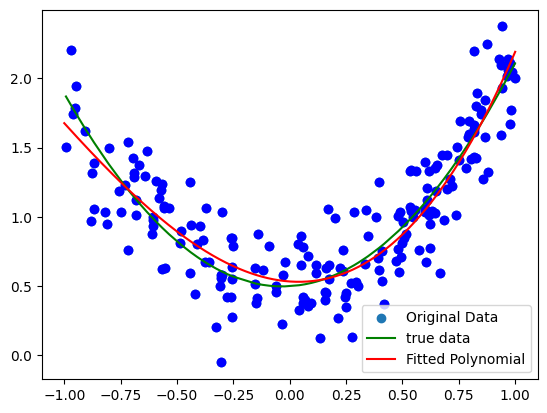

=============== THETA ===============
[[ 0.5339035 ]
 [-0.11471754]
 [ 1.39955569]
 [ 0.3720946 ]]


In [39]:
# Cost function
def compute_cost(x, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(x, theta) - y)**2)

# Gradient descent function
def gradient_descent(x, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = hypothesis(x, theta)
        for j in range(len(theta)):
            theta[j] -= (alpha/m) * np.sum((predictions - y) * (x**j))
        cost_history.append(compute_cost(x, y, theta))

    return theta, cost_history

# Initial parameters
theta_initial = np.random.randn(4, 1)

# Gradient descent parameters
alpha = 0.1  # Learning rate
iterations = 1000  # Number of iterations

# Run gradient descent
theta_final, cost_history = gradient_descent(x, y, theta_initial, alpha, iterations)

# Plotting the results
# Original Dataset
plt.scatter(x, y, label='Original Data')

# Hypothesis with final parameters
x_values = np.linspace(-1, 1, 400).reshape(400, 1)
y_values = hypothesis(x_values, theta_final)

plt.scatter(x, y, c='b')
plt.plot(x, y_true, c='g', label='true data')
plt.plot(x_values, y_values, color='red', label='Fitted Polynomial')
plt.legend()
plt.show()

print ("=============== THETA ===============")
print (theta_final)

# WITH REGULARIZATION

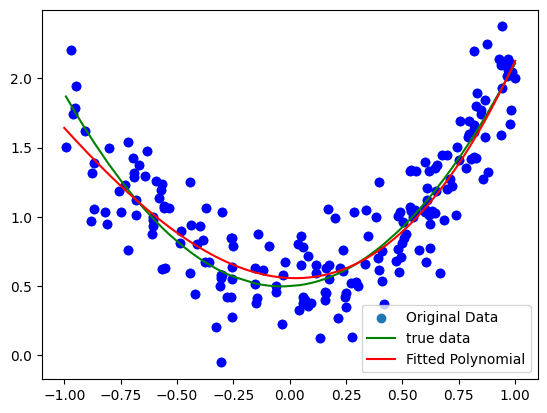

=============== THETA ===============
[[ 0.55876832]
 [-0.06844993]
 [ 1.32489303]
 [ 0.31030508]]


In [4]:
# Modified cost function with L2 regularization
def compute_cost_regularized(x, y, theta, lambda_):
    m = len(y)
    regularization_term = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    return (1 / (2 * m)) * np.sum((hypothesis(x, theta) - y) ** 2) + regularization_term

# Modified gradient descent function with L2 regularization
def gradient_descent_regularized(x, y, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = hypothesis(x, theta)
        theta[0] -= (alpha / m) * np.sum(predictions - y)
        for j in range(1, len(theta)):
            theta[j] -= alpha * ((1 / m) * np.sum((predictions - y) * (x**j)) + (lambda_ / m) * theta[j])
        cost_history.append(compute_cost_regularized(x, y, theta, lambda_))

    return theta, cost_history


# Initial parameters
theta_initial = np.random.randn(4, 1)

# Gradient descent parameters
alpha = 0.1  # Learning rate
iterations = 1000  # Number of iterations
lambda_ = 1  # Regularization parameter

# Run regularized gradient descent
theta_final, cost_history = gradient_descent_regularized(x, y, theta_initial, alpha, iterations, lambda_)

# Plotting the results
# Original Dataset
plt.scatter(x, y, label='Original Data')

# Hypothesis with final parameters
x_values = np.linspace(-1, 1, 400).reshape(400, 1)
y_values = hypothesis(x_values, theta_final)

plt.scatter(x, y, c='b')
plt.plot(x, y_true, c='g', label='true data')
plt.plot(x_values, y_values, color='red', label='Fitted Polynomial')
plt.legend()
plt.show()

print ("=============== THETA ===============")
print (theta_final)


## Grid Search

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming hypothesis, compute_cost_regularized, and gradient_descent_regularized functions are already defined

def train_and_evaluate(x_train, y_train, x_val, y_val, alpha, iterations, lambda_):
    theta = np.random.randn(4, 1)  # Initialize theta
    theta, _ = gradient_descent_regularized(x_train, y_train, theta, alpha, iterations, lambda_)
    y_pred = hypothesis(x_val, theta)
    return mean_squared_error(y_val, y_pred)

# Define the parameter grid
alphas = [0.001, 0.01, 0.1, 0.3]
iterations_list = [100, 500, 1000]
lambdas = [0, 0.1, 1, 10]

# Splitting the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

# Search for the best parameters
best_alpha = None
best_iterations = None
best_lambda = None
best_error = float('inf')

for alpha in alphas:
    for iterations in iterations_list:
        for lambda_ in lambdas:
            error = train_and_evaluate(x_train, y_train, x_val, y_val, alpha, iterations, lambda_)
            if error < best_error:
                best_error = error
                best_alpha = alpha
                best_iterations = iterations
                best_lambda = lambda_

print("Best alpha:", best_alpha)
print("Best iterations:", best_iterations)
print("Best lambda:", best_lambda)
print("Best mean squared error:", best_error)


Best alpha: 0.3
Best iterations: 500
Best lambda: 0.1
Best mean squared error: 0.04369087735848474


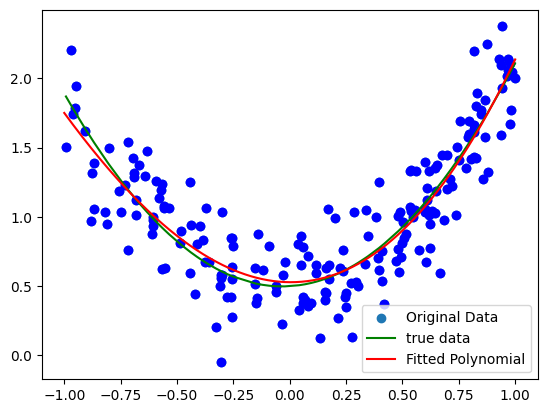

=============== THETA ===============
[[ 0.52873229]
 [-0.0132363 ]
 [ 1.414192  ]
 [ 0.20625368]]


In [6]:
# Modified cost function with L2 regularization
def compute_cost_regularized(x, y, theta, lambda_):
    m = len(y)
    regularization_term = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    return (1 / (2 * m)) * np.sum((hypothesis(x, theta) - y) ** 2) + regularization_term

# Modified gradient descent function with L2 regularization
def gradient_descent_regularized(x, y, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = hypothesis(x, theta)
        theta[0] -= (alpha / m) * np.sum(predictions - y)
        for j in range(1, len(theta)):
            theta[j] -= alpha * ((1 / m) * np.sum((predictions - y) * (x**j)) + (lambda_ / m) * theta[j])
        cost_history.append(compute_cost_regularized(x, y, theta, lambda_))

    return theta, cost_history


# Initial parameters
theta_initial = np.random.randn(4, 1)

# Gradient descent parameters
alpha = best_alpha  # Learning rate
iterations = best_iterations  # Number of iterations
lambda_ = best_lambda  # Regularization parameter

# Run regularized gradient descent
theta_final, cost_history = gradient_descent_regularized(x, y, theta_initial, alpha, iterations, lambda_)

# Plotting the results
# Original Dataset
plt.scatter(x, y, label='Original Data')

# Hypothesis with final parameters
x_values = np.linspace(-1, 1, 400).reshape(400, 1)
y_values = hypothesis(x_values, theta_final)

plt.scatter(x, y, c='b')
plt.plot(x, y_true, c='g', label='true data')
plt.plot(x_values, y_values, color='red', label='Fitted Polynomial')
plt.legend()
plt.show()

print ("=============== THETA ===============")
print (theta_final)


# Using Pylint Model

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Transform the features into polynomial features
degree = 3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
x_poly = poly_features.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and calculate the mean squared error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean squared error:", mse)


Model coefficients: [[ 6.58298044 -4.49054619  3.02025458]]
Model intercept: [3.87252065]
Mean squared error: 1.0309124968922103
